<a href="https://colab.research.google.com/github/welingtongomes/Dataset-Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import Dropout
from keras.utils import np_utils





In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #importa o dataset mnist da biblioteca Keras

11490434/11490434 [==============================] - 0s 0us/step


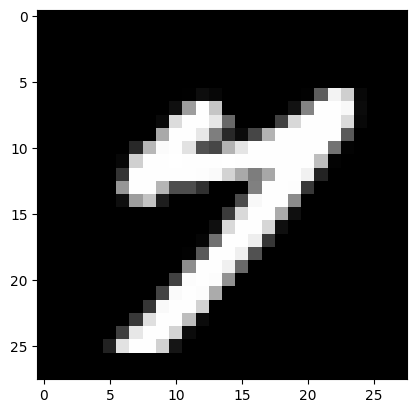

0


In [ ]:
first_image = X_train[1001] #obtem a imegem de treino no índice 1000


#realiza a manipulação dos dados da imagem (transforma em float)
first_image = numpy.array(first_image, dtype ='float')
pixels = first_image.reshape((28,28))

#exibe a imagem do vetor

plt.imshow(pixels, cmap ='gray')
plt.show()

print(y_train[1000]) #imprime a classe da imagem de treino no índice 1000

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] #calculando o total de pixels da imagem
print (f'Total de Pixels:',num_pixels)

#transformando os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels entre 0 e 1 para ter um treinamento mais eficiente na rede

X_train2 = X_train2 / 255
X_test2 = X_test2 / 255







Total de Pixels: 784


In [ ]:
#transforma a imagem em uma matriz de 0 e 1
#***transforma o y utilizando o método do machine learning chamado one-hot-vector
#***onde transforma o y em uma matriz apontando o número 1 sendo a classe a qual a imagem corresponde

y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

#obtem o número de classes do problema
num_classes = y_test_h.shape[1]

print(num_pixels)
print(y_train[1001])
print(y_train_h[1001])


784
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
#Cria um modelo do tipo sequencial
model = Sequential()
model.add(InputLayer(input_shape=num_pixels))
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) #cria a primeira camada da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) #cria a segunda camada da rede
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #cria a camada de saída

model.summary() #imprime informações sobre o modelo


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # compila o modelo criado

In [ ]:
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size = 100) #executa o treinamento

Epoch 1/20
600/600 [==============================] - 56s 92ms/step - loss: 0.1814 - accuracy: 0.9444 - val_loss: 0.0843 - val_accuracy: 0.9728
Epoch 2/20
600/600 [==============================] - 51s 84ms/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.0896 - val_accuracy: 0.9715
Epoch 3/20
600/600 [==============================] - 52s 87ms/step - loss: 0.0475 - accuracy: 0.9842 - val_loss: 0.0715 - val_accuracy: 0.9784
Epoch 4/20
600/600 [==============================] - 59s 98ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0690 - val_accuracy: 0.9811
Epoch 5/20
600/600 [==============================] - 51s 85ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0828 - val_accuracy: 0.9797
Epoch 6/20
600/600 [==============================] - 52s 87ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0892 - val_accuracy: 0.9775
Epoch 7/20
600/600 [==============================] - 51s 85ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0779 - val_accuracy:

In [ ]:
#Obtém a imagem número 1001

x = X_train2[50]
print(x.shape)
x = numpy.expand_dims(x, axis=0)
print(x.shape)

# imprime a avaliação da amostra
print(model.predict(x))
print(numpy.argmax(model.predict(x)))

(784,)
(1, 784)
1/1 [==============================] - 0s 73ms/step
[[8.5733687e-26 2.3267460e-23 1.2646560e-19 1.0000000e+00 1.8581075e-26
  3.5399626e-19 1.9842362e-30 2.6259806e-22 5.7400902e-22 6.3865709e-17]]
1/1 [==============================] - 0s 39ms/step
3


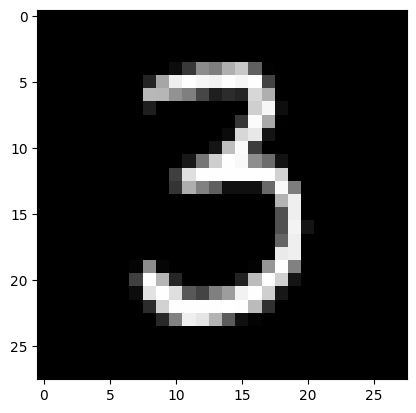

0


In [ ]:
first_image = X_train[50] #obtem a imegem de treino no índice 50, conforme realizamos predição acima.


#realiza a manipulação dos dados da imagem (transforma em float)
first_image = numpy.array(first_image, dtype ='float')
pixels = first_image.reshape((28,28))

#exibe a imagem do vetor

plt.imshow(pixels, cmap ='gray')
plt.show()

print(y_train[1000]) #imprime a classe da imagem de treino no índice 50, conforme realizamos predição acima.